#Recreating Error forsmall chunk sizing

In [65]:
pip install docx


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 25.2 MB/s eta 0:00:00
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53903 sha256=67e221fa23a7f5ac9a4f729709cc4f1cfa9f338ce4de155dcdaf2dbf3cc517d3
  Stored in directory: c:\users\alexa\appdata\local\pip\cache\wheels\c1\3e\c3\e81c11effd0be5658a035947c66792dd993bcff317eae0e1ed
Successfully built docx
Note: you may need to restart the kernel to use updated packages.


In [66]:
import os
from getpass import getpass
import nltk
from transformers import pipeline
from langchain_ai21 import AI21SemanticTextSplitter

# Optional imports
try:
    import boto3
except ModuleNotFoundError:
    boto3 = None
    print("Warning: boto3 not found, some features will be disabled.")

try:
    import chromadb
except ModuleNotFoundError:
    chromadb = None
    print("Warning: chromadb not found, some features will be disabled.")

try:
    import stripe
except ModuleNotFoundError:
    stripe = None
    print("Warning: stripe not found, some features will be disabled.")

# Adjust the path to include two levels up
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Import LlamaParse from two levels up
import sys
sys.path.append(root_dir)  # Add the directory to the system path
from api.py import LlamaParse  # Import LlamaParse from the correct location

os.environ["AI21_API_KEY"] = getpass()

# Download the punkt tokenizer
nltk.download('punkt')

# Initialize the LlamaParse parser
parser = LlamaParse(
    api_key="llx-nVU72akRzwB9ZrfBYWwuPOo1lFvW3jncNMKcxFpCt81r9Cjm",
    result_type="markdown",  # "markdown" and "text" are available
    verbose=True
)

# Function to load and concatenate text from the PDF using LlamaParse
async def load_text_from_pdf(filepath):
    documents = await parser.aload_data(filepath)
    text = "".join([doc.text for doc in documents])
    return text

# Function to split large text into smaller chunks using AI21SemanticTextSplitter
def split_large_text(text, chunk_size=250, max_chunk_size=99000):
    text_splitter = AI21SemanticTextSplitter(chunk_size=chunk_size)
    
    if len(text) <= max_chunk_size:
        return text_splitter.split_text(text)

    all_chunks = []
    for i in range(0, len(text), max_chunk_size):
        chunk = text[i:i + max_chunk_size]
        all_chunks.extend(text_splitter.split_text(chunk))
    
    return all_chunks

# Initialize the text-generation pipeline using a smaller model available on Hugging Face
small_model = "distilgpt2"  # Smaller and faster model
llm = pipeline("text-generation", model=small_model)  # No device argument needed

# Main processing function to load and split text
async def process_pdf(filepath):
    text = await load_text_from_pdf(filepath)
    chunks = split_large_text(text)
    return chunks

# Example usage
filename = os.path.join(root_dir, "example.pdf")  # Adjusted to be two levels up
output_filename = os.path.join(root_dir, "output.txt")  # Adjusted to be two levels up

# Run the processing function within an async context
import asyncio
chunks = asyncio.run(process_pdf(filename))

# Write the generated text to a file with UTF-8 encoding
with open(output_filename, "w", encoding="utf-8") as f:
    for chunk in chunks:
        generated_text = llm(chunk, max_new_tokens=100)[0]["generated_text"]
        f.write(generated_text + "\n")
        f.write("----------------------\n")  # Write the separator after each chunk

print(f"Generated text has been saved to {output_filename}")


ModuleNotFoundError: No module named 'exceptions'

The 3 smallest chunks are:
Chunk Size: 189 characters
Chunk Content:
Question  
number  Quality Criteria  Weighting  
1.   2.   3.   4.   5.   6.   7.   8.   9.   10.   11.   12.   13.   14.   15.   16.     17.   18.   19.   20.   21.   22.   23.   24.   25.


Chunk Size: 192 characters
Chunk Content:
Residential Red Book Valuations  PS/2024/04 9/10/04 10/03/04 11/09/04 14:34




SUMMARY



SOCIAL



PURPOSE







MATTERS






SORIES OF

EVERLY MESSAGE




SUMMARY





SUMMARY




SUMMARY


Chunk Size: 217 characters
Chunk Content:
Residential Red Book Valuations  PS/2024/04 9 
 
3.01 $849.90 $746.90 $723.72 632 803 1.02
3.01 $722.72 632 803 10
3.11 $638.88 $722.72 632 9
14.01 $636.91 $722.72 632 803 10
10.00 $564.84 $564.84 $564.84 $564.84 $564




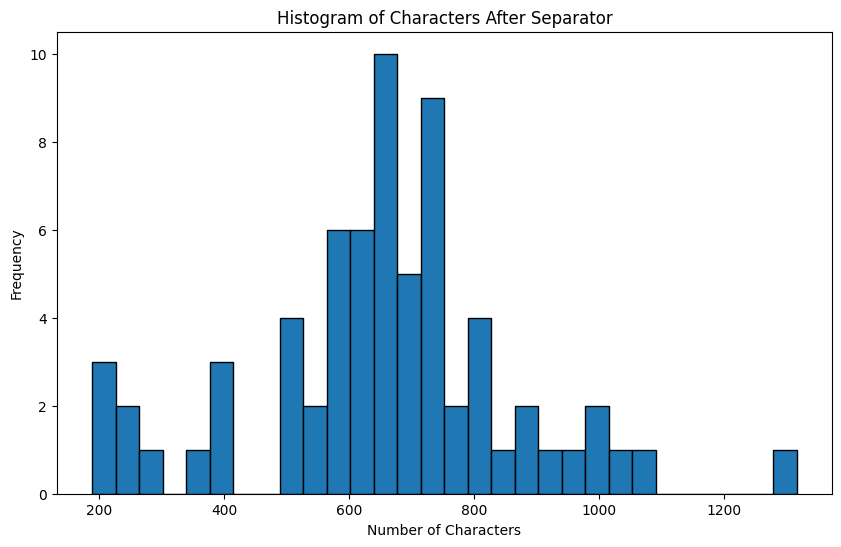

Processed text from output.txt


In [51]:
import matplotlib.pyplot as plt

# Function to load text from a .txt file
def load_text_from_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# Function to split text by a specific separator and store text and sizes
def split_and_store_chunks(text, separator='----------------------'):
    # Split the text by the separator
    chunks = text.split(separator)
    
    # Store both size and text of each chunk
    chunk_info = [(len(chunk.strip()), chunk.strip()) for chunk in chunks[1:] if len(chunk.strip()) > 0]  # Skip empty chunks
    return chunk_info

# Function to get the 3 smallest chunks
def get_smallest_chunks(chunk_info, n=3):
    # Sort by size and get the smallest n chunks
    smallest_chunks = sorted(chunk_info, key=lambda x: x[0])[:n]
    return smallest_chunks

# Plot histogram of chunk sizes
def plot_chunk_sizes_histogram(chunk_info):
    chunk_sizes = [size for size, _ in chunk_info]
    plt.figure(figsize=(10, 6))
    plt.hist(chunk_sizes, bins=30, edgecolor='black')
    plt.title('Histogram of Characters After Separator')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    plt.show()

# Main function to load text, split into chunks, get smallest chunks, and plot histogram
def process_file_and_plot_histogram(filepath):
    text = load_text_from_file(filepath)
    
    # Define the separator
    separator = '----------------------'
    
    # Split text by the separator and get chunk information
    chunk_info = split_and_store_chunks(text, separator)
    
    if not chunk_info:
        print("No valid chunks found. Please check the separator and the content of the file.")
        return
    
    # Get the 3 smallest chunks
    smallest_chunks = get_smallest_chunks(chunk_info)
    
    # Print the 3 smallest chunks with their sizes
    print("The 3 smallest chunks are:")
    for size, chunk in smallest_chunks:
        print(f"Chunk Size: {size} characters")
        print("Chunk Content:")
        print(chunk)
        print("\n" + "="*40 + "\n")
    
    # Plot histogram of chunk sizes
    plot_chunk_sizes_histogram(chunk_info)

    print(f"Processed text from {filepath}")

# Example usage
filename = "output.txt"
process_file_and_plot_histogram(filename)


In [67]:
from langchain_ai21 import AI21SemanticTextSplitter

TEXT = (
    "We’ve all experienced reading long, tedious, and boring pieces of text - financial reports, "
    "legal documents, or terms and conditions (though, who actually reads those terms and conditions to be honest?).\n"
    "Imagine a company that employs hundreds of thousands of employees. In today's information "
    "overload age, nearly 30% of the workday is spent dealing with documents. There's no surprise "
    "here, given that some of these documents are long and convoluted on purpose (did you know that "
    "reading through all your privacy policies would take almost a quarter of a year?). Aside from "
    "inefficiency, workers may simply refrain from reading some documents (for example, Only 16% of "
    "Employees Read Their Employment Contracts Entirely Before Signing!).\nThis is where AI-driven summarization "
    "tools can be helpful: instead of reading entire documents, which is tedious and time-consuming, "
    "users can (ideally) quickly extract relevant information from a text. With large language models, "
    "the development of those tools is easier than ever, and you can offer your users a summary that is "
    "specifically tailored to their preferences.\nLarge language models naturally follow patterns in input "
    "(prompt), and provide coherent completion that follows the same patterns. For that, we want to feed "
    'them with several examples in the input ("few-shot prompt"), so they can follow through. '
    "The process of creating the correct prompt for your problem is called prompt engineering, "
    "and you can read more about it here."
)

semantic_text_splitter_chunks = AI21SemanticTextSplitter(chunk_size=1000)
chunks = semantic_text_splitter_chunks.split_text(TEXT)

print(f"The text has been split into {len(chunks)} chunks.")
for chunk in chunks:
    print(chunk)
    print("====")

The text has been split into 2 chunks.
We’ve all experienced reading long, tedious, and boring pieces of text - financial reports, legal documents, or terms and conditions (though, who actually reads those terms and conditions to be honest?).

Imagine a company that employs hundreds of thousands of employees.

In today's information overload age, nearly 30% of the workday is spent dealing with documents.

There's no surprise here, given that some of these documents are long and convoluted on purpose (did you know that reading through all your privacy policies would take almost a quarter of a year?).

Aside from inefficiency, workers may simply refrain from reading some documents (for example, Only 16% of Employees Read Their Employment Contracts Entirely Before Signing!).
====
This is where AI-driven summarization tools can be helpful: instead of reading entire documents, which is tedious and time-consuming, users can (ideally) quickly extract relevant information from a text.

With la